In [3]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mstrzalkowski/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [10]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

# define a list of documents.
# data = ["This is the first document",
#         "This is the second document",
#         "This is the third document",
#         "This is the fourth document",
#         "Mam cię, zjem cię"]

data = [
    #Spisane ze strony głównej interii, 12:13, 29 X 2025
    "Słynna działka koło CPK. Szykuje się przełom, jest ruch KOWR",
    "Wojska USA wycofane tez z Polski? Mamy komentarz obozu władzy",
    "Rusza budowa strategicznej fabryki. Szef MON: Wielki dzień dla Polski",
    "Bardzo zły scenariusz na linii frontu. Kluczowe miasta bliskie upadku.",
    "Polska reaguje na działania floty cieni. Bedzie zgoda na użycie broni.",
    "Nowy dyrektor PZN z jasnym przekazem. Nie powinni w naszym środowisku",
    #Spisane z Apokalipsy
    "Upadł, upadł Babilon - stolica. I stała się siedliskiem demonów i kryjówką wszelkiego ducha nieczystego"
    "I usłyszałem inny głos z nieba mówiący Ludu mój, wyjdźcie z niej",
    "bo twymi czarami omamione zostały wszystkie narody",
    "aby pożreć trupy królów, trupy wodzów i trupy mocarzy, trupy koni i tych, co ich dosiadają",
    #Coś po angielsku
    "What shall we do with a drunken sailort early in the morning?",
    "Dlaczego mi nie mówicie, że nazwałem repozytorium od złego przedmiotu xD"
]

# preproces the documents, and create TaggedDocuments
tagged_data = [TaggedDocument(words=word_tokenize(doc.lower()),
                              tags=[str(i)]) for i,
               doc in enumerate(data)]

# train the Doc2vec model
model = Doc2Vec(vector_size=3,
                min_count=2, epochs=500)
model.build_vocab(tagged_data)
model.train(tagged_data,
            total_examples=model.corpus_count,
            epochs=model.epochs)

# get the document vectors
document_vectors = [model.infer_vector(
    word_tokenize(doc.lower())) for doc in data]

#  print the document vectors
for i, doc in enumerate(data):
    print("Document", i+1, ":", doc)
    print("tokenized:", word_tokenize(doc.lower()))
    print("Vector:", document_vectors[i])
    print()

Document 1 : Słynna działka koło CPK. Szykuje się przełom, jest ruch KOWR
tokenized: ['słynna', 'działka', 'koło', 'cpk', '.', 'szykuje', 'się', 'przełom', ',', 'jest', 'ruch', 'kowr']
Vector: [-0.8043022 -0.4263978 -0.9807514]

Document 2 : Wojska USA wycofane tez z Polski? Mamy komentarz obozu władzy
tokenized: ['wojska', 'usa', 'wycofane', 'tez', 'z', 'polski', '?', 'mamy', 'komentarz', 'obozu', 'władzy']
Vector: [-0.9648885  -0.03091523 -1.2766182 ]

Document 3 : Rusza budowa strategicznej fabryki. Szef MON: Wielki dzień dla Polski
tokenized: ['rusza', 'budowa', 'strategicznej', 'fabryki', '.', 'szef', 'mon', ':', 'wielki', 'dzień', 'dla', 'polski']
Vector: [-0.8118839 -0.0284331 -0.8613389]

Document 4 : Bardzo zły scenariusz na linii frontu. Kluczowe miasta bliskie upadku.
tokenized: ['bardzo', 'zły', 'scenariusz', 'na', 'linii', 'frontu', '.', 'kluczowe', 'miasta', 'bliskie', 'upadku', '.']
Vector: [-1.1244262  -0.14090568 -0.51705855]

Document 5 : Polska reaguje na działania f

Document 1 : Słynna działka koło CPK. Szyku
Vector: [-0.8043022 -0.4263978 -0.9807514]

Document 2 : Wojska USA wycofane tez z Pols
Vector: [-0.9648885  -0.03091523 -1.2766182 ]

Document 3 : Rusza budowa strategicznej fab
Vector: [-0.8118839 -0.0284331 -0.8613389]

Document 4 : Bardzo zły scenariusz na linii
Vector: [-1.1244262  -0.14090568 -0.51705855]

Document 5 : Polska reaguje na działania fl
Vector: [-1.2221776   0.07897501 -0.6893903 ]

Document 6 : Nowy dyrektor PZN z jasnym prz
Vector: [-0.99668866 -0.00877872 -0.9635519 ]

Document 7 : Upadł, upadł Babilon - stolica
Vector: [-1.374126  -0.881583  -1.4098016]

Document 8 : bo twymi czarami omamione zost
Vector: [-0.16098575  0.11008845 -0.12420031]

Document 9 : aby pożreć trupy królów, trupy
Vector: [ 0.867404  -1.107471  -2.3702786]

Document 10 : What shall we do with a drunke
Vector: [-0.62848634  0.17190783 -1.0567651 ]

Document 11 : Dlaczego mi nie mówicie, że na
Vector: [-0.39499897  0.02233792 -1.0503927 ]



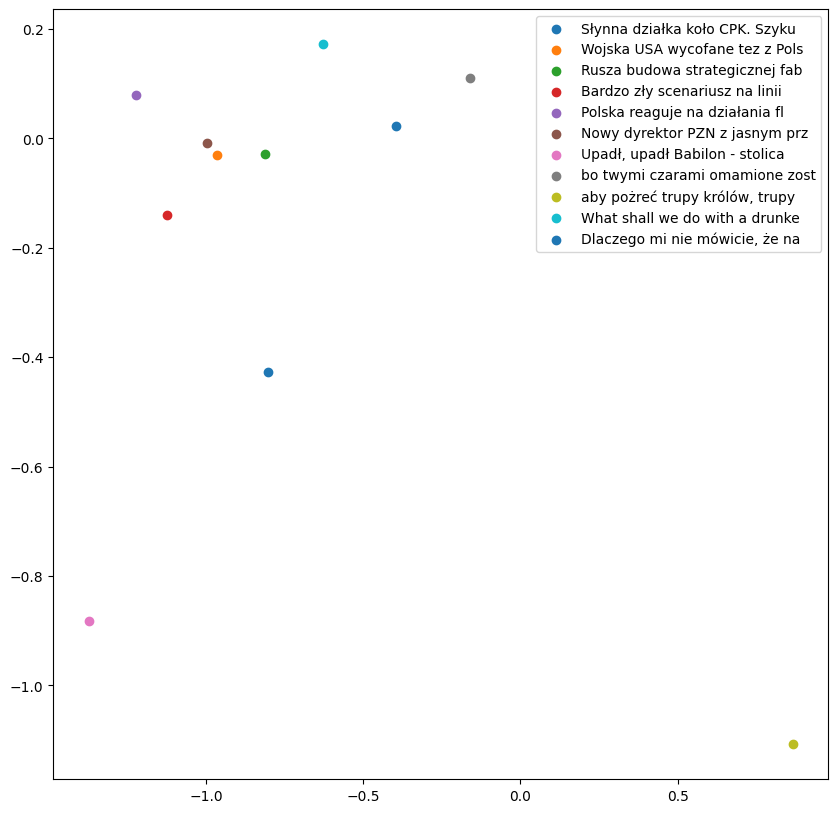

In [13]:
plt.figure(figsize=(10,10))
import matplotlib.pyplot as plt
for i, doc in enumerate(data):
    print("Document", i+1, ":", doc[:30])
    print("Vector:", document_vectors[i])
    plt.scatter(document_vectors[i][0], document_vectors[i][1], label = doc[:30])
    print()
plt.legend()

Document 1 : Słynna działka koło CPK. Szyku
Vector: [-0.8043022 -0.4263978 -0.9807514]

Document 2 : Wojska USA wycofane tez z Pols
Vector: [-0.9648885  -0.03091523 -1.2766182 ]

Document 3 : Rusza budowa strategicznej fab
Vector: [-0.8118839 -0.0284331 -0.8613389]

Document 4 : Bardzo zły scenariusz na linii
Vector: [-1.1244262  -0.14090568 -0.51705855]

Document 5 : Polska reaguje na działania fl
Vector: [-1.2221776   0.07897501 -0.6893903 ]

Document 6 : Nowy dyrektor PZN z jasnym prz
Vector: [-0.99668866 -0.00877872 -0.9635519 ]

Document 7 : Upadł, upadł Babilon - stolica
Vector: [-1.374126  -0.881583  -1.4098016]

Document 8 : bo twymi czarami omamione zost
Vector: [-0.16098575  0.11008845 -0.12420031]

Document 9 : aby pożreć trupy królów, trupy
Vector: [ 0.867404  -1.107471  -2.3702786]

Document 10 : What shall we do with a drunke
Vector: [-0.62848634  0.17190783 -1.0567651 ]

Document 11 : Dlaczego mi nie mówicie, że na
Vector: [-0.39499897  0.02233792 -1.0503927 ]



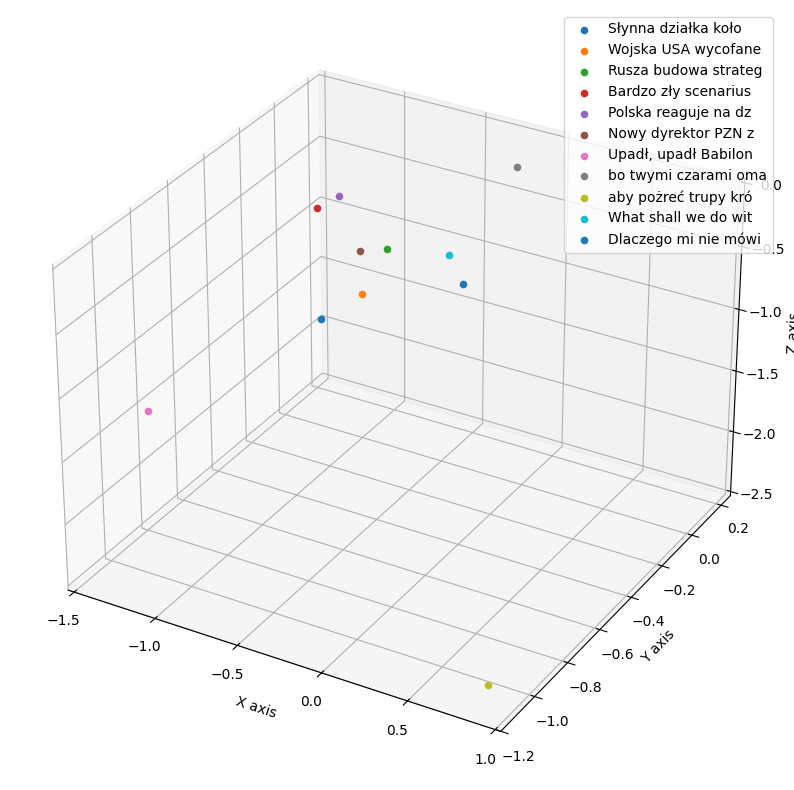

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i, doc in enumerate(data):
    print("Document", i + 1, ":", doc[:30])
    print("Vector:", document_vectors[i])
    ax.scatter(
        document_vectors[i][0],
        document_vectors[i][1],
        document_vectors[i][2],
        label=doc[:20]
    )
    print()

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()
plt.show()
